[Reference](https://medium.com/codex/automate-the-building-of-machine-learning-models-using-automl-h2o-in-python-and-r-so-easy-e864c5621171)

# H2O AutoML in Python

In [1]:
# Installing the H2O package
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=785850babed8931a96f391acd04deec8646563c8f8b0b1ef5718d0d4da6c0caa
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [2]:
# Importing necessary packages
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp481y6mzv
  JVM stdout: /tmp/tmp481y6mzv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp481y6mzv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_10op3l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
# Import the Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = load_breast_cancer()
x = data.data
y = data.target
df = pd.DataFrame(x, columns = data.feature_names)

# Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

# Convert x_train and y_train to pandas DataFrames
x_train_df = pd.DataFrame(x_train, columns = data.feature_names)
y_train_df = pd.DataFrame({'target': y_train})

# Merge x_train and y_train into a single DataFrame
train_df = pd.concat([x_train_df, y_train_df], axis = 1)

# Convert x_test and y_test to pandas DataFrames
x_test_df = pd.DataFrame(x_test, columns = data.feature_names)
y_test_df = pd.DataFrame({'target': y_test})

# Merge x_test and y_test into a single DataFrame
test_df = pd.concat([x_test_df, y_test_df], axis = 1)

# Convert the pandas DataFrame to an H2OFrame
breast_cancer_h2o_train = h2o.H2OFrame(train_df)
breast_cancer_h2o_test = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# Convert the target column to a categorical variable
breast_cancer_h2o_train['target'] = breast_cancer_h2o_train['target'].asfactor()
breast_cancer_h2o_test['target'] = breast_cancer_h2o_test['target'].asfactor()

In [5]:
# Specify features and target variable
x = breast_cancer_h2o_train.columns[:-1]
y = 'target'

In [6]:
# Build modles using H2O's AutoML
model = H2OAutoML(max_runtime_secs=60, seed=13)
model.train(x=x, y=y, training_frame=breast_cancer_h2o_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20231219_34033


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    69                 69                          20947                  6            8            7.95652       9             27            19.5652

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00011032240553006713
RMSE: 0.01050344731647982
LogLoss: 0.004192455315651898
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9438501688428289
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      176  0    0        (0.0/176.0)
1      0    279  0        (0.0/279.0)
Total  176  279  0        (0.0/455.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.94385      1         238
max f2                       0.94385      1         238
max f0point5                 0.94385      1         238
max accuracy                 0.94385      1         238
max precision                0.999665     1         0
max recall                   0.94385      1         238
max specificity              0.999665     1         0
max absolute_mcc             0.94385      1         238
max min_per_class_accuracy   0.94385      1         238
max mean_per_class_accuracy  0.94385      1         238
max tns                      0.999665     176       0
max fns                      0.999665     278       0
max fps                      0.000590447  176       399
max tps                      0.94385      279       238
max tnr                      0.999665     1         0
max fnr                      0.999665     0.996416  0
max fpr                      0.000590447  1         399
max tpr                      0.94385      1         238

Gains/Lift Table: Avg response rate: 61.32 %, avg score: 61.32 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010989                    0.999599           1.63082   1.63082            1                0.999622     1                           0.999622            0.0179211       0.0179211                  63.0824   63.0824            0.0179211
2        0.021978                    0.999598           1.63082   1.63082            1                0.999599     1                           0.99961             0.0179211       0.0358423                  63.0824   63.0824            0.0358423
3        0.0307692                   0.999598           1.63082   1.63082            1                0.999598     1                           0.999607            0.0143369       0.0501792                  63.0824   63.0824            0.0501792
4        0.0417582                   0.99959            1.63082   1.63082            1                0.999596     1                           0.999604            0.0179211       0.0681004                  63.0824   63.0824            0.0681004
5        0.0505495                   0.999575           1.63082   1.63082            1                0.999585     1                           0.999601            0.0143369       0.0824373                  63.08

In [7]:
# Display the leaderboard
leaderboard = model.leaderboard
print(leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_3_AutoML_1_20231219_34033                           0.994929  0.0895668  0.99675                0.0394673  0.160726  0.025833
StackedEnsemble_BestOfFamily_3_AutoML_1_20231219_34033  0.994909  0.075875   0.99625                0.0281036  0.140928  0.0198608
GLM_1_AutoML_1_20231219_34033                           0.994888  0.0816401  0.996166               0.0242139  0.145972  0.0213079
StackedEnsemble_BestOfFamily_2_AutoML_1_20231219_34033  0.994787  0.0760007  0.995938               0.0231651  0.141579  0.0200446
StackedEnsemble_AllModels_2_AutoML_1_20231219_34033     0.994542  0.0780978  0.995859               0.0281036  0.143878  0.0207009
StackedEnsemble_AllModels_1_AutoML_1_20231219_34033     0.993931  0.0798322  0.995146               0.0281036  0.144171  0.0207852
StackedEnsemble_BestOfFamily_1_AutoML_1_20231219_34033  0.993891  0.0800156  0.99495

In [8]:
# Display the prediction using test data with the chosen model
predictions = model.leader.predict(breast_cancer_h2o_test)
print(predictions)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict           p0          p1
        0  0.673906     0.326094
        1  0.00259574   0.997404
        1  0.000582137  0.999418
        0  0.992347     0.00765347
        1  0.000596106  0.999404
        0  0.985405     0.0145954
        1  0.00209656   0.997903
        1  0.000463056  0.999537
        1  0.00262604   0.997374
        0  0.0698721    0.930128
[114 rows x 3 columns]



In [9]:
# Display the model performance
performance = model.leader.model_performance(breast_cancer_h2o_test)
print(performance)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.03286366949693678
RMSE: 0.18128339553565512
LogLoss: 0.13776123078965208
Mean Per-Class Error: 0.041666666666666664
AUC: 0.9846866096866097
AUCPR: 0.9906358165718627
Gini: 0.9693732193732194

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07899007512568612
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      33   3    0.0833   (3.0/36.0)
1      0    78   0        (0.0/78.0)
Total  33   81   0.0263   (3.0/114.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0789901    0.981132  80
max f2                       0.0789901    0.992366  80
max f0point5                 0.477221     0.981675  75
max accuracy                 0.22097      0.973684  78
max precision                0.999613     1         0
max recall                   0.0789901

<Axes: xlabel='variable'>

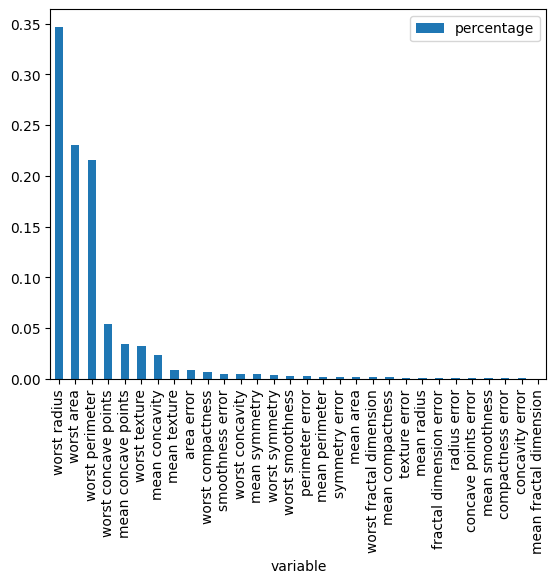

In [10]:
# Example for the chosen model
feature_importance = model.leader.varimp(use_pandas = True)
feature_importance.plot(kind = 'bar', x = 'variable', y = 'percentage')

<Axes: >

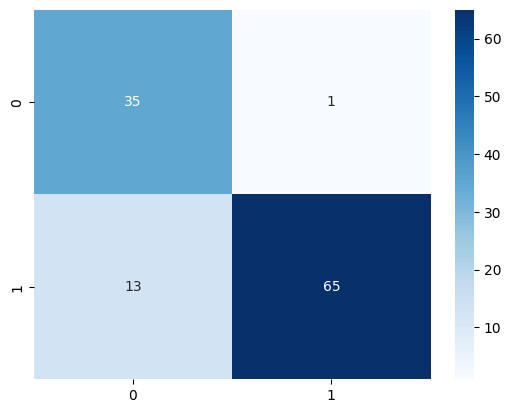

In [11]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = breast_cancer_h2o_test['target'].as_data_frame()
y_pred = predictions['predict'].as_data_frame()
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [12]:
# Stop the H20 cluster
h2o.shutdown()

H2O session _sid_a9b1 closed.


<ipython-input-12-5f9a7c3c8859>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


# H2O AutoML in R
```
# Install and load h2o package
install.packages("h2o", type = "source", repos = "http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")
library(h2o)

# Initialize H2O cluster
h2o.init()

# Load the mtcars dataset
data(mtcars)

# Convert the dataset to an H2O Frame
h2o_df <- as.h2o(mtcars)

# Split data into training and testing sets
splits <- h2o.splitFrame(h2o_df, ratios = c(0.8), seed = 123)
train_data <- h2o.assign(splits[[1]], "train_data")
test_data <- h2o.assign(splits[[2]], "test_data")

# Identify the response variable
response_column <- "mpg"

# Run H2O AutoML for regression
aml <- h2o.automl(x = setdiff(names(train_data), response_column),
                  y = response_column,
                  training_frame = train_data,
                  max_runtime_secs = 60)  # You can adjust the runtime or other parameters

# View AutoML Leaderboard
leaderboard <- h2o.get_leaderboard(aml)
print(leaderboard)
leader_model <- aml@leader

# Make predictions on test data
predictions <- h2o.predict(leader_model, newdata = test_data)
print(predictions)

# Look into the model performance
performance = h2o.performance(leader_model, newdata = test_data)
print(performance)

# Get the summary of leader_model
summary(leader_model)

# Extract predicted values from the H2O Frame
predicted_values <- as.vector(predictions$predict)
actual_values <- as.vector(test_data$mpg)

plot(actual_values, predicted_values, main = "Predicted vs. Actual",
     xlab = "Actual Values", ylab = "Predicted Values")
abline(0, 1, col = "red", lty = 2)  # Add a 45-degree line for comparison

# Computer additional metrics
mse <- h2o.mse(performance)
rmse <- sqrt(mse)
r_squared <- h2o.r2(performance)

cat("Mean Squared Error:", mse, "\n")
cat("Root Mean Squared Error:", rmse, "\n")
cat("R-squared:", r_squared, "\n")
```